# Notebook used in the live lecture

# From the expert part 2: the data science process

Last week, we prepared our data for machine learning. We did the following:
- looked for outliers and dealt with them if needed
- looked for missing values or other strange values and dealt with them if needed
- converted all strings to numbers
- created a few new features by combining columns (feature engineering)

We are now ready for step 4 in the CRISP-DM process:

1. **Business understanding (determining our goals and purpose of the project)**

Can we predict the occurance of diabetes from health and demographic data?

2. **Data Understanding**

Week 1 - EDA and visualization

3. **Data Preparation**

Data cleaning, feature engineering

4. **Modeling**

The modeling step usually involves  machine learning, but it could involve other statistics (e.g an A/B test using a t-test). We want to be able to generate some useful model to satisfy our goal from step 1. 

5. **Evaluation**

Once the first pass at modeling or business intelligence component has been completed, we want to evaluate performance. For a machine learning model, we can use metrics (like accuracy) to measure how well our system is performing. We want to see how well our solution has addressed our issue we started with. We might go back to previous steps at this point to try and improve our model or project, or even spin off into a new project.

6. **Deployment**


Once we are happy with the results of our model, stats, or business intelligence (BI), we can deploy it. For BI, this might be a report or automated reporting we set up. For machine learning or other statistics, this could be a software system (e.g. an API) we set up and make available to clients or our organization. We want to continuously monitor performance of the system to make sure it still works well and as expected. We should also document the results and status of the project (usually in a report of some kind).

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import plot_confusion_matrix

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
The first step in any type of data analysis is to **look** at your data.

I **strongly** encourage you to look at the data file in a programmer's text editor. **NOT** Notepad. **NOT** Excel. Those programs manipulate the view of the data in subtle ways that can cause problems. I use Sublime and Notepad++.

You can also look at the first few rows of your dataset from within a Jupyter notebook.  However, this **does not replace** the need to visually inspect **the entire dataset** outside of your notebook.
    
<b>Helpful Hint::</b> You can execute os commands from within your notebook by starting the command with '!'.  <br>
For example, to list out al the files in a directory,<br>
* On a PC:  type '!dir' <br>
* On a MAC: type '!ls' <br>
</div>

In [5]:
!head ../data/prepped_diabetes_data.csv

Patient number,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
1,193,77,49,19,1,61,119,22.5,118,70,32,38,0,0.8421052631578947,0.2538860103626943
2,146,79,41,19,1,60,135,26.4,108,58,33,40,0,0.825,0.2808219178082192
3,217,75,54,20,1,67,187,29.3,110,72,40,45,0,0.8888888888888888,0.2488479262672811
4,226,97,70,20,1,64,114,19.6,122,64,31,39,0,0.7948717948717948,0.30973451327433627
5,164,91,67,20,1,70,141,20.2,122,86,32,39,0,0.8205128205128205,0.40853658536585363
6,170,69,64,20,1,64,161,27.6,108,70,37,40,0,0.925,0.3764705882352941
7,149,77,49,20,1,62,115,21.0,105,82,31,37,0,0.8378378378378378,0.3288590604026846
8,164,71,63,20,0,72,145,19.7,108,78,29,36,0,0.8055555555555556,0.38414634146341464
9,230,112,64,20,0,67,159,24.9,100,90,31,39,0,0.7948717948717948,0.2782608695652174


In [3]:
# we can give an index number or name for our index column, or leave it blank
df = pd.read_csv('../data/prepped_diabetes_data.csv', index_col='Patient number')
df

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,,
1,193,77,49,19,1,61,119,22.5,118,70,32,38,0,0.842105,0.253886
2,146,79,41,19,1,60,135,26.4,108,58,33,40,0,0.825000,0.280822
3,217,75,54,20,1,67,187,29.3,110,72,40,45,0,0.888889,0.248848
4,226,97,70,20,1,64,114,19.6,122,64,31,39,0,0.794872,0.309735
5,164,91,67,20,1,70,141,20.2,122,86,32,39,0,0.820513,0.408537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,83,1,59,125,25.2,150,90,35,40,0,0.875000,0.193833
387,226,279,52,84,1,60,192,37.5,144,88,41,48,1,0.854167,0.230088
388,301,90,118,89,1,61,115,21.7,218,90,31,41,0,0.756098,0.392027


### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
Rather than displaying the entire dataframe, I prefer to look at a smapling of the rows in the dataframe.

Alternatives Python Commands for Viewing Your Dataframe: 
 - head() - returns the first five observations within the dataframe. You can specify a specific number of rows within the the parentheses
 - tail() - returns the last five observations within the dataframe. You can specify a specific number of rows within the the parentheses
 - sample() - returns a randomly selected observations within the dataframe. You can specify a specific number of rows within the the parentheses
</div>

In [4]:
df.head(10)

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,,
1,193,77,49,19,1,61,119,22.5,118,70,32,38,0,0.842105,0.253886
2,146,79,41,19,1,60,135,26.4,108,58,33,40,0,0.825000,0.280822
3,217,75,54,20,1,67,187,29.3,110,72,40,45,0,0.888889,0.248848
4,226,97,70,20,1,64,114,19.6,122,64,31,39,0,0.794872,0.309735
5,164,91,67,20,1,70,141,20.2,122,86,32,39,0,0.820513,0.408537
6,170,69,64,20,1,64,161,27.6,108,70,37,40,0,0.925000,0.376471
7,149,77,49,20,1,62,115,21.0,105,82,31,37,0,0.837838,0.328859
8,164,71,63,20,0,72,145,19.7,108,78,29,36,0,0.805556,0.384146
9,230,112,64,20,0,67,159,24.9,100,90,31,39,0,0.794872,0.278261


In [5]:
df.tail()

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,,
386,227,105,44,83,1,59,125,25.2,150,90,35,40,0,0.875000,0.193833
387,226,279,52,84,1,60,192,37.5,144,88,41,48,1,0.854167,0.230088
388,301,90,118,89,1,61,115,21.7,218,90,31,41,0,0.756098,0.392027
389,232,184,114,91,1,61,127,24.0,170,82,35,38,1,0.921053,0.491379
390,165,94,69,92,1,62,217,39.7,160,82,51,51,0,1.000000,0.418182


In [6]:
df.sample(5)

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,,
193,260,67,46,44,1,62,159,29.1,140,94,36,43,0,0.837209,0.176923
207,242,108,53,46,1,62,183,33.5,130,86,37,45,0,0.822222,0.219008
155,191,74,33,40,0,72,270,36.6,136,70,45,49,0,0.918367,0.172775
101,194,86,67,35,0,66,159,25.7,115,64,31,35,0,0.885714,0.345361
349,236,111,82,68,1,61,119,22.5,142,96,29,37,0,0.783784,0.347458


We can check to make sure our loaded data is still in the proper format with no missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Age              390 non-null    int64  
 4   Gender           390 non-null    int64  
 5   Height           390 non-null    int64  
 6   Weight           390 non-null    int64  
 7   BMI              390 non-null    float64
 8   Systolic BP      390 non-null    int64  
 9   Diastolic BP     390 non-null    int64  
 10  waist            390 non-null    int64  
 11  hip              390 non-null    int64  
 12  Diabetes         390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  hdl_chol_ratio   390 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 48.8 KB


# 4. Modeling

We can now do some modeling and analysis of the data. We will use a simple binary classifier, which predicts a probability of a 1 as the outcome for each datapoint. The model we'll start with is logistic regression.

With our problem, we are doing classification, where we predict the class - a 0 (no diabetes) or 1 (diabetes). Classification is a type of supervised learning. For this, we have features (inputs) and targets (outputs), and we train a model (fit the model) with data. We call this data our "training data". From the training data, our algorithm learn patterns in the data and we can make predictions about the data.

First, let's break up our data into features and targets:

In [8]:
features = df.drop('Diabetes', axis=1)
targets = df['Diabetes']

In [9]:
features.head()

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,
1,193,77,49,19,1,61,119,22.5,118,70,32,38,0.842105,0.253886
2,146,79,41,19,1,60,135,26.4,108,58,33,40,0.825000,0.280822
3,217,75,54,20,1,67,187,29.3,110,72,40,45,0.888889,0.248848
4,226,97,70,20,1,64,114,19.6,122,64,31,39,0.794872,0.309735
5,164,91,67,20,1,70,141,20.2,122,86,32,39,0.820513,0.408537


In [10]:
targets.head()

Patient number
1    0
2    0
3    0
4    0
5    0
Name: Diabetes, dtype: int64

Next, we split our data into train and test sets. We will use the training data to fit our model, and evaluate performance on both the train and test sets. It's important to evaluate the model on unseen data (our test data), because we can overfit to our training data. Overfitting happens when our model is too complex and fits to noise in the data. This results in a high score on the training data but poor performance on the test data. Underfitting happens when our model is not complex enough, and results in poor performance on both the training and testing data. We can also use cross-validation to break up our data into several versions of train and test sets, but simply using a train and test set is the foundation for this. The sklearn library makes it easy to do this:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42)

We can also change the size of train and test sets with either the `train_size` or `test_size`. The default test size is 0.25 or 25%.

In [12]:
x_train.shape

(292, 14)

In [13]:
x_test.shape

(98, 14)

In [17]:
y_train.shape

(292,)

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
Heres what the addition of the test_size parameter would look like. 
<br>
To verify the size of our training and test datasets, we can use len(). A 80/20 split of 390 observations (number of observations in the dataframe - from the info() command above) would result in 312/78 rows (aka observations). 
</div>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, test_size=.25)

In [15]:
len(x_train)

292

In [16]:
len(x_test)

98

We can now fit our model to the training data. All sklearn models share a similar pattern: we create the model, then fit it to data. Once it's been fit, we can use methods like predict and predict_proba to predict values and probabilities of values.

In [17]:
lr_model = LogisticRegression(max_iter=1000)
#lr_model.fit(x_train, y_train)

In [19]:
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# 5. Evaluation

Usually we would try several models and choose the best one based on metrics. The `score` method of classifiers in sklearn has accuracy as it's default method. We simply give the `score` method our features and targets, and it computes accuracy. We can see our accuracy (0.908 or 90.8% on the test set) is better than the "no information rate", or simply predicting that all datapoints are the "majority class" (0). That  would give us 0.846, or around 85%, accuracy.

In [23]:
# our "no information" rate is 84.6%, or the majority class fraction
df['Diabetes'].value_counts(normalize=True)

0    0.846154
1    0.153846
Name: Diabetes, dtype: float64

In [20]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.9212328767123288
0.9081632653061225


We can also see our test accuracy is slightly lower than our training score. If the test score is very much lower than our training score, it's a sign of overfitting. In this case, our difference isn't too bad although it could be slightly better.

The score we want to use to evaluate the performance of the model is the test score.

Another useful evaluation tool, especially for binary classification, is the confusion matrix, which we can plot with sklearn easily:

In [25]:
# This was deprecated in sklearn 
#confusion_matrix( x_test, y_test)#, colorbar=False) # this argument only works with sklearn 0.24 and up

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
Do you remember what the red box above is trying to tell you? (check out the recording for a full explanation)
<br>
As promised, here is alternative code for producing a confusion matrix, without the deprecation warning.  Remember, in future classes, code/notebooks with deprecation warnings will not be graded.  So let's practice cleaning these up now.
</div>

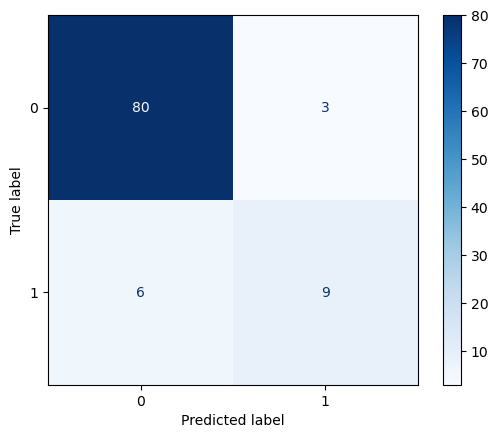

In [21]:
# packages necessary for this block of code
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#gather the predictions for our test dataset
predictions = lr_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix shows true negatives (TN, or a prediction of 0 when the true label is 0), false negatives (FN, prediction=0 true=1), true positives (TP, prediction=true=1) and false positives (FP, prediction=1 true=0). From this, we can get an idea of how the algorithm is performing and compare multiple models. For example, here, we might care a lot about false negatives, since we would be missing people who may get diabetes and they may not be properly  treated. A false positive may cause someone to take precautionary measures, but may not be so bad. We can also tune our algorithm to reduce false negatives, which is covered in the advanced section.

Another aspect of evaluation in CRISP-DM is checking our model against our original business or organizational objectives. For example, in step 1 of CRISP-DM, we may have set an objective of correctly predicting 90% of positive diabetes cases. We could then use the true positive rate (TPR = TP / (TP + FN) , also known as recall) to evaluate performance. In this case, the TPR is 9/15 or 60%, and not high enough. However, with some tuning of the model, we can achieve this. Most sklearn models have a `predict_proba()` method which predicts probabilities for each class:

In [23]:
lr_model.predict_proba(x_test)[:15]

array([[0.97732376, 0.02267624],
       [0.99167799, 0.00832201],
       [0.98377168, 0.01622832],
       [0.9921387 , 0.0078613 ],
       [0.39366497, 0.60633503],
       [0.74939329, 0.25060671],
       [0.97663843, 0.02336157],
       [0.99319509, 0.00680491],
       [0.97880703, 0.02119297],
       [0.90784304, 0.09215696],
       [0.98513621, 0.01486379],
       [0.99301276, 0.00698724],
       [0.96441725, 0.03558275],
       [0.94586159, 0.05413841],
       [0.80000933, 0.19999067]])

This gives us the probability for 0 (first column) and 1 (second column). By default, the `predict()` method of models (used in the confusion matrix function) uses a threshold of 0.5:

In [22]:
lr_model.predict(x_test)[:15]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
(lr_model.predict_proba(x_test)[:5, 1] > 0.5).astype('int')

array([0, 0, 0, 0, 1])

However, if we lower our threshold, we can get fewer false negatives but more false positives. We can use a threshold of 0.2, so any prediction probability of 0.2 or above is rounded up to 1:

In [34]:
predictions_lower_thresh = (lr_model.predict_proba(x_test)[:, 1] > 0.13).astype('int')
predictions_lower_thresh

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

We can check the accuracy and true positive rate (recall) with the new predictions:

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, predictions_lower_thresh))
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))

0.8163265306122449
0.9333333333333333


We can see that with a lower threshold of 0.13, we can achive over 90% TPR, although accuracy has dropped to 82% (below the no information rate). However, if the TPR is more important than the accuracy, then we could use this model.

Last, we can look at the coefficients from the model. In general, larger coefficients mean a feature is more strongly related to the target, but we should scale the features to get an accurate read on this.

In [36]:
lr_model.coef_

array([[ 0.00687446,  0.03109068, -0.0210144 ,  0.04441329,  0.30447004,
        -0.15086551,  0.02659125, -0.07294619,  0.00674225,  0.00985945,
        -0.02973122, -0.04197652, -0.01249184, -0.00650956]])

In [27]:
features.columns

Index(['Cholesterol', 'Glucose', 'HDL Chol', 'Age', 'Gender', 'Height',
       'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip',
       'waist_hip_ratio', 'hdl_chol_ratio'],
      dtype='object')

In [28]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

<Axes: >

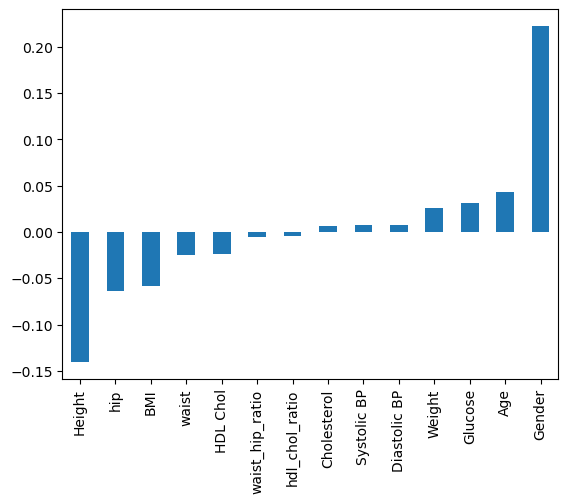

In [29]:
coef_df.T.sort_values(by=0).plot.bar(legend=False)

In [30]:
10**0.3

1.9952623149688795

In [31]:
10**-.15

0.7079457843841379

We can see the unscaled data has the height and gender as the most important features. With gender, we could say between female (0) and male (1) the log odds of having diabetes increases by 0.3. Or, taking `10**0.3`, we can see that the odds of diabetes increases by a factor of 2 between men and women in this dataset. We can also see that age, glucose, weight, and other factors are positively correlated with the occurance of diabetes, which makes sense.

# 6. Deployment

We need to think about how we would want to deploy this and use it in a business or organizational setting. Are we going to have the data sent to us, we run the model by hand, and send results back? That is not very efficient. A common way of deploying a model is with an API (application programming interface), which allow programmers to send data to our API and get a prediction back. Cloud providers like AWS, Azure, and GCP are making this easier to deploy at scale using Python. We could create an API, and other software engineers could integrate it into software for doctors. Doctors would then be able to use the software to get a prediction for the probability someone might develop diabetes based on their biographical and healt data.

Below, we write a short summary of our overall process and results.

## Brief summary writeup

We were able to successfully model the occurance of diabetes using a machine learning model with biographical and health data. Minimal cleaning was performed on the data: we dropped the 'height' column because it had little relation to the target (the weakest Phi-k correlation), and converted categorical string columns to numeric values (the Gender and Diabetes columns). From the Phi-k correlation, we found the glucose measurement had the strongest correlation to the target, with higher glucose levels usually signifying the occurance of diabetes. We fit a logistic regression model to the data, and achieved 91% accuracy on the test data compared with a majority class fraction of 85%. So far, the model shows promise.

# (optional) Advanced section

Here, we will cover:

- other ML models in sklearn
- tuning hyperparameters
- other evaluation metrics (ROC/AUC, classification report, precision/recall/F1 score)
- using probabilities of predictions

### Other ML models in sklearn

 There are several other classification models in sklearn. The documentation for sklearn is good, and a few pages on these classifiers are [here](https://scikit-learn.org/stable/supervised_learning.html) and [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). We will look at the random forest and gradient boosting classifier, since these are two other models that often work well. Both of these models are based on decision trees, and combine many models to reduce bias and variance at the same time.

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_model = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(max_depth=4, random_state=42)

rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [33]:
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_test, y_test))

0.9807692307692307
0.8974358974358975


In [34]:
print(gb_model.score(x_train, y_train))
print(gb_model.score(x_test, y_test))

1.0
0.8974358974358975


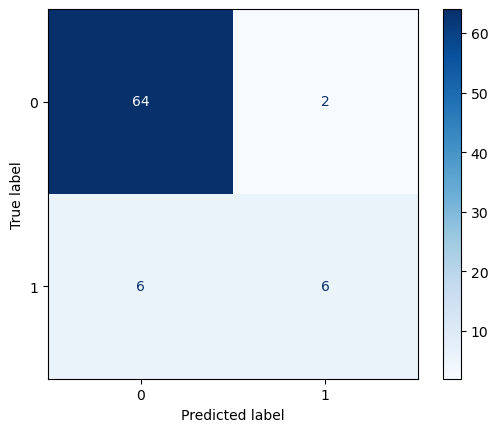

In [35]:
#plot_confusion_matrix(rf_model, x_test, y_test, cmap='Blues')


#gather the predictions for our test dataset
predictions = rf_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

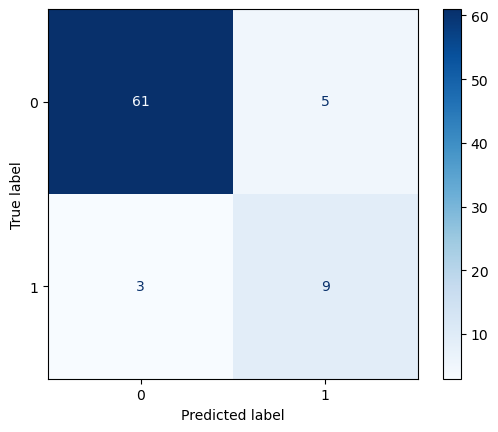

In [36]:
#plot_confusion_matrix(gb_model, x_test, y_test, cmap='Blues')

#gather the predictions for our test dataset
predictions = gb_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=gb_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

We can see the models are overfitting here, since the training accuracy is much higher than the test accuracy. This means we are fitting to the noise in the data. It makes sense with the outlier detection from last week, since from the IQR method it looked like a lot of samples were outliers. These ensemble tree-based methods are prone to overfitting like this. With any model, we can optimize the hyperparameters to minimize or remove overfitting and optimize performance.

### Optimizing hyperparameters

Hyperparameters are the settings for the ML algorithms, like max_depth above, which sets the max depth of the trees used in the classifiers. There are many ways to tune them - we could change values by hand and compare scores. Or, sklearn has some methods shown [here](https://scikit-learn.org/stable/modules/grid_search.html) that can be used. A few of those methods are random and grid search. We provide a range or list of hyperparmeters to try, and it either randomly tries different combinations and picks the best result (highest accuracy or other metric) or it methodically searches through every combination with grid search.

However, one of the best methods is to use is Bayesian optimization, from scikit-optimize (skopt). First, we need to install the package with `conda install -c conda-forge scikit-optimize`. Currently (4-2021) sckit-opt has an issue with the latest sklearn, and we need to downgrade sklearn to version 0.23 or follow another solution from [here](https://github.com/scikit-optimize/scikit-optimize/issues/978). We can install sklearn 0.23 with `conda install -c conda-forge scikit-learn=0.23`. Then we can use the hyperparameter search:

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
As mentioned above, there is a version incompatiblity issue between nupy, sklearn and skopt. Rather than mess with downgrading things to older versions of the packages. I'll demostrate a different approach to achieve the same results.
</div>

In [37]:
# from skopt import BayesSearchCV

# opt = BayesSearchCV(
#     RandomForestClassifier(),
#     {
#         'max_depth': (3, 20),
#         'n_estimators': (50, 500),
#         'max_features': (3, 14),
#         'min_samples_split': (2, 5)
#     },
#     n_iter=32,
#     cv=3
# )

# opt.fit(x_train, y_train)

# print("val. score: %s" % opt.best_score_)
# print("test score: %s" % opt.score(x_test, y_test))

In [38]:
#opt.best_estimator_

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }


grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(x_train, y_train)

In [40]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is: 0.9166666666666666


In [41]:
#saving the best performing model
model_grid.best_estimator_

RandomForestClassifier(max_depth=3, max_features=7, min_samples_leaf=2,
                       min_samples_split=3)

This takes a while to run, since it is trying several combinations of hyperparameters. Essentially, it is checking the cross-validation accuracy scores and then trying the next combination of hyperparameters that seems like it should improve performance the most. The top answer to this [Quora question](https://www.quora.com/How-does-Bayesian-optimization-work) goes into it in more detail.

We can search the Bayesian optimization increased our accuracy of the model but a good amount, and is slightly better than the 90.8% accuracy from our linear regression.

Different models have different hyperparameters, and learning which ones are important and what values they often take is part of learning ML and building up the expertise.  For random forests, we used some of the most important hyperparamaters, but not all hyperparameters. The max_depth argument is how deep the decision trees can be, while n_estimators is the number of trees. max_features is the number of features it randomly selects from for each tree, and min_samples_split is how many samples need to be in a leaf of the tree to split it. We'll learn more about decision trees next week.

For logistic regression, we can optimize the regularization with the C, penalty, and l1_ratio hyperparameters.

### Other evaluation metrics

Now that we have an optimized model, let's look at some other evaluation metrics to score it with We already saw accuracy, which is the percent of correct predictions out of the total number of samples. We can also look at some more specific counts of correct values with precision and recall. Precision is the number of TP divided by the number of all predicted positives (TP + FP). Recall is the number of TP divided by the number of all real positives (TP + FN). In our case, we might care most about improving recall. We can easily access these metrics with sklearn:

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.82      0.75      0.78        12

    accuracy                           0.94        78
   macro avg       0.89      0.86      0.87        78
weighted avg       0.93      0.94      0.93        78



It shows the precision and recall for each class, as well as a macro and weighted average (micro). Macro is simply the average between the values for the classes, whiche the weighted average (micro) adds up the values for each individual class in the calculations. So macro is (precision_0 + precision_1) / 2 while micro is (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1) for precision.

We also see the F1 score, which is the harmonic mean between precision and recall 2 * (P * R) / (P + R). We also see support, which is the number of samples.

The package `yellowbrick` also provides a way to plot this classification report, as well as some other evaluation plotting functions.

Another nice metric for binary classification is the reciever operating characteristic (ROC) curve and AUC score:

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
Another function that has been replaced in sklearn
</div>

In [43]:
# from sklearn.metrics import plot_roc_curve

# roc = plot_roc_curve(model_grid, x_test, y_test)

#roc.roc_auc

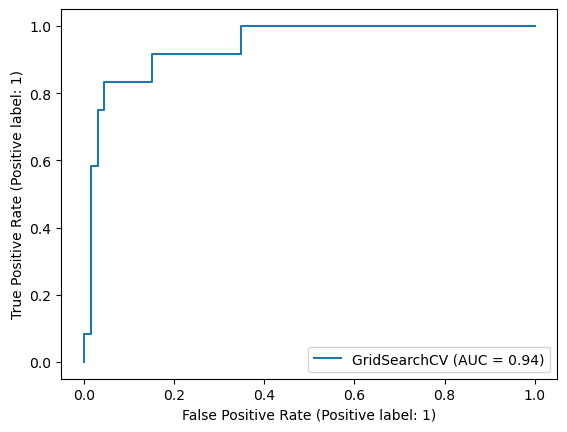

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_grid, x_test, y_test)
plt.show()

This shows the FPR vs TPR (FPR = FP / (FP + TN) and TPR = TP / (TP + FN)). Each point is calculated by taking a value for the rounding threshold (the value where we round up a predicted probability to 1). A perfect model would touch the upper left of the plot, meaning a 100% true positive rate and 0% false positive rate. We can also get the AUC, or area under the curve, which is the integral of the line. It is the area under the ROC curve. For a perfect model, this would be 1. A model that randomly guesses values would approximately be a diagonal line from 0, 0 to 1, 1.

We can compare this AUC score to our other model, and we actually see the logistic regression model performs better. We are using the `drop_intermediate=False` argument to keep all the TPR and FPR values for all thresholds (all unique predicted probability values in the predictions) so we can use it in the next section.

### Live Lecture Additions

<div class="alert alert-block alert-info">
<b>Lecture Additions:</b> <br>
And one more
</div>

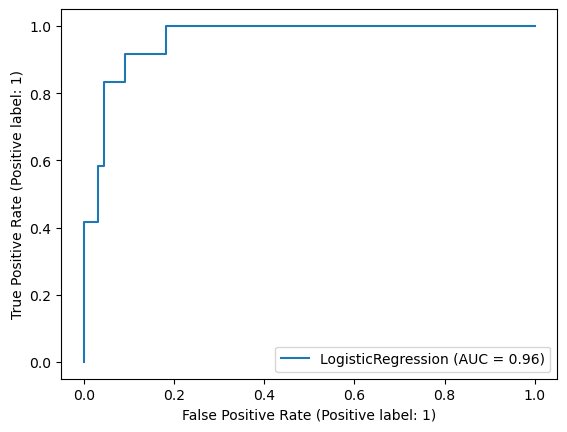

In [45]:
#roc = plot_roc_curve(lr_model, x_test, y_test)

RocCurveDisplay.from_estimator(lr_model, x_test, y_test)
plt.show()

### Using prediction probabilities

It looks like our logistic regression model is best, so we'll use that. With most models in sklearn, there is a predict_proba method we can use, as we saw. We can get the probability for class 1 (diabetes) and create some plots:

In [46]:
probabilities = lr_model.predict_proba(x_test)[:, 1]

In [47]:
prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})

<Axes: xlabel='predicted_probability', ylabel='Density'>

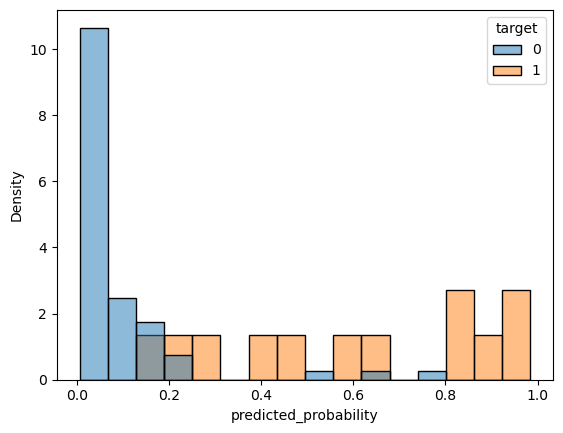

In [48]:
import seaborn as sns

sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)

It looks like our predictions are mostly good, but we do have several low-confidence predictions for the occurance of diabetes. We can use pandas filtering to examine these and see if there are commonalities among them.

In [49]:
index = prob_df[(prob_df['target'] == 1) & (prob_df['predicted_probability'] < 0.5)].index
prob_df.loc[index]

,predicted_probability,target
Patient number,,
354,0.307501,1
341,0.388425,1
83,0.134924,1
340,0.194921,1
272,0.470583,1


In [50]:
x_test.loc[index]

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,waist_hip_ratio,hdl_chol_ratio
Patient number,,,,,,,,,,,,,,
354,289,111,50,70,1,60,220,43.0,126,80,51,54,0.944444,0.173010
341,204,173,37,66,0,67,146,22.9,138,78,36,48,0.750000,0.181373
83,191,155,58,31,1,62,237,43.3,140,87,53,56,0.946429,0.303665
340,246,104,62,66,1,66,189,30.5,200,94,45,46,0.978261,0.252033
272,219,173,31,56,1,65,197,32.8,100,50,41,50,0.820000,0.141553


We can see these patients have glucose values similar to non-diabetics, and similar heights. Since the model had height negatively correlated with diabetes, and these patients have taller than average height in the dataset, it could be partly why they are being misclassified (or at least not confidently correctly classified). We might try removing the height column from the data, since intuitively it shouldn't be correlated to diabetes (one would think). Then we could re-evaluate the model.

One last thing we can do with the probabilities of our classifier is try and get an optimal threshold for rounding. This is a little involved, but is discussed in a few places, including [here](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/) and [here](https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python). Essentially, we get the unique sorted thresholds from our probabability predictions (sorted from greatest to least), add on a value of 1 to the beginning of the thresholds list or array, then get the threshold which has the maximum TPR-FPR. This is called Youden's J and is one method for optimizing the threshold. To get all TPR and FPR rates from the ROC curve, we need to use the function like so `roc = plot_roc_curve(lr_model, x_test, y_test, drop_intermediate=False)`. Then we can get roc.tpr and roc.fpr.